In [1]:
import sys

sys.path.append("..")

from tools.tools import (
    get_ts_data_for_graph,
    load_sample,
    graph_to_label_tensor,
    score
)
from tools.display_tools import plot_current_state_of_graph,simple_sample_display
from tools.baseline_methods import cross_correlation_for_causal_discovery, calc_lagged_cross_corr
import pickle
import pandas as pd
import numpy as np
from IPython.display import HTML
from hydra import initialize, compose
import matplotlib.pyplot as plt
import networkx as nx
from datetime import date, timedelta, datetime
from dwdweather import DwdWeather
import numpy as np
from scipy.stats import linregress

In [2]:
# To keep everything clean we use hydra for HPs.
with initialize(version_base=None, config_path="../config/"):
    cfg = compose(config_name='predict_single.yaml')

In [3]:
# Load the raw ts data and the labels for a specific sample:
ds  =pickle.load(open("../" + cfg.sample_path + "random_5" + "/test.p", "rb"))


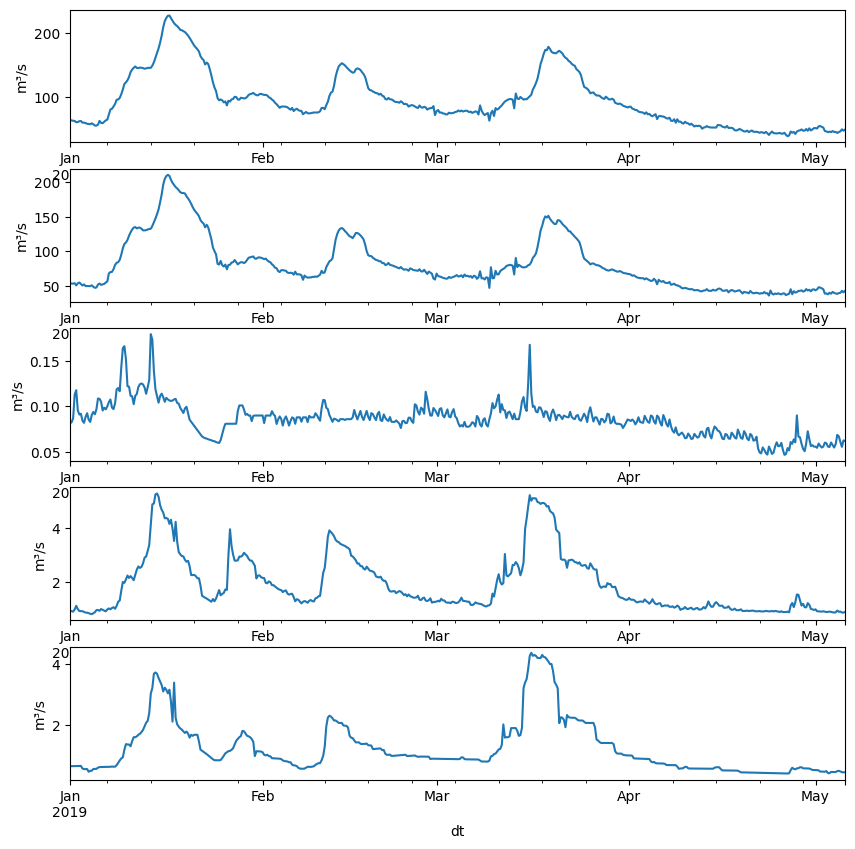

In [38]:
data = load_sample(p= "../" + cfg.data_path, which= ds[7])
# Run some standard preprocessing steps
sample_data = get_ts_data_for_graph(
    data,
    resolution="6H",
    interpolate=False,
    normalize=False,
)
#TS
fix, axs = plt.subplots(5, 1, figsize=(10, 10))
for n,x in enumerate(sample_data.columns):#
    sample_data.iloc[:500][x].plot(ax=axs[n])
    axs[n].set_ylabel("m³/s")

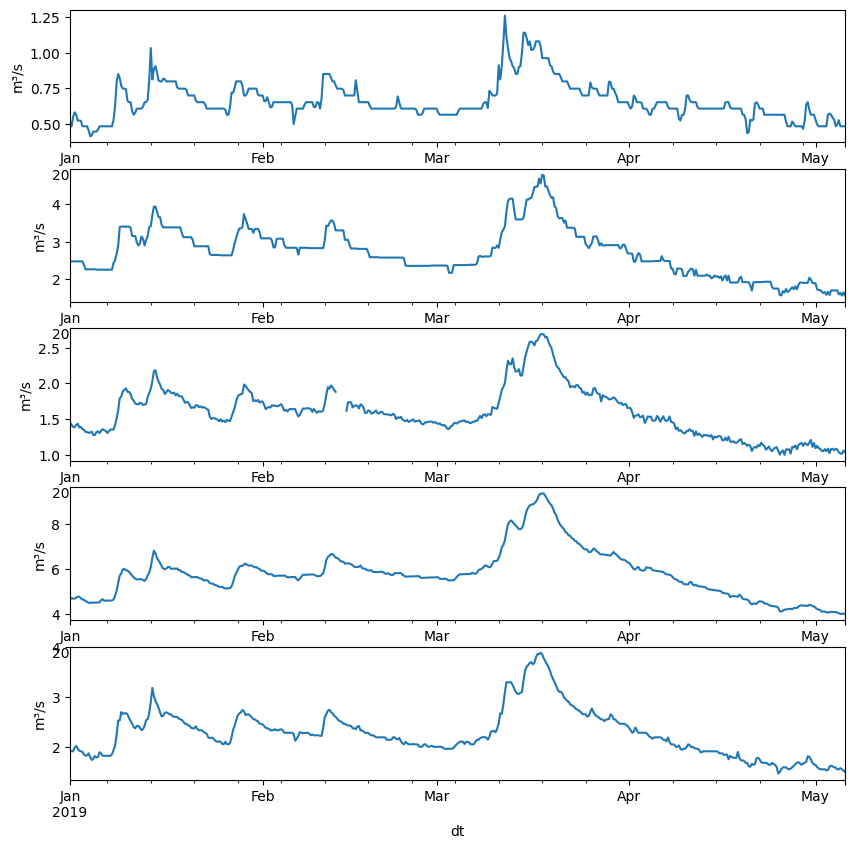

In [40]:
data = load_sample(p= "../" + cfg.data_path, which= ds[4])
# Run some standard preprocessing steps
sample_data = get_ts_data_for_graph(
    data,
    resolution="6H",
    interpolate=False,
    normalize=False,
)
#TS
fix, axs = plt.subplots(5, 1, figsize=(10, 10))
for n,x in enumerate(sample_data.columns):#
    sample_data.iloc[:500][x].plot(ax=axs[n])
    axs[n].set_ylabel("m³/s")

In [42]:
graph_to_label_tensor(ds[4], human_readable=True)

Cause                    
             154  891  893  894  895
Effect 154   0.0  0.0  0.0  0.0  0.0
       891   0.0  0.0  1.0  0.0  0.0
       893   0.0  0.0  0.0  1.0  0.0
       894   0.0  0.0  0.0  0.0  1.0
       895   1.0  0.0  0.0  0.0  0.0

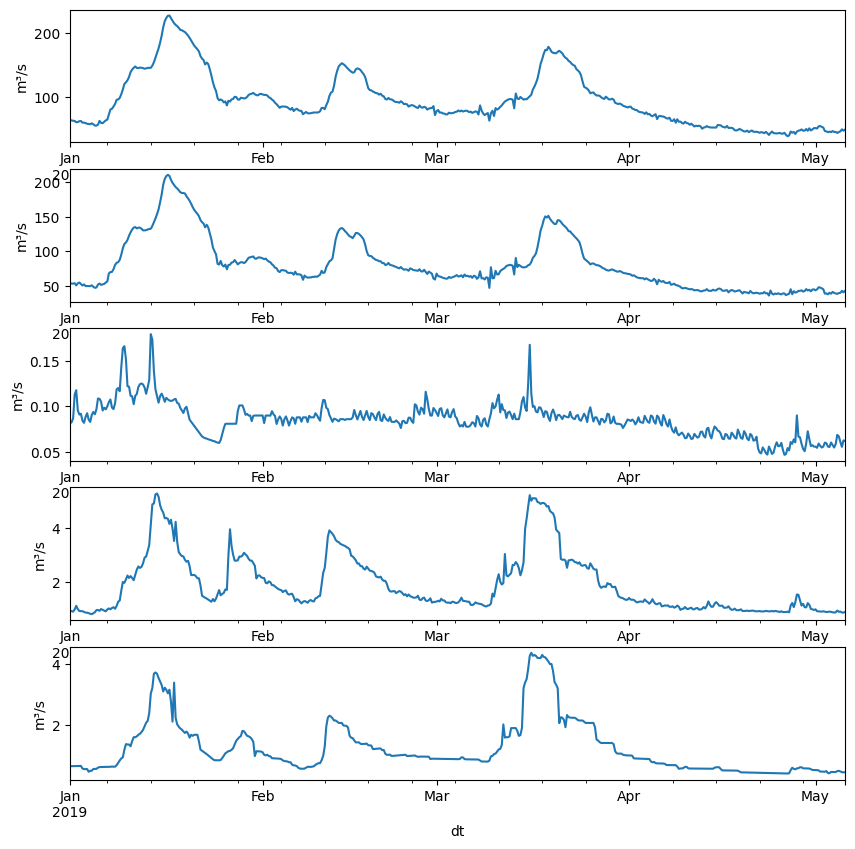

In [39]:
data = load_sample(p= "../" + cfg.data_path, which= ds[6])
# Run some standard preprocessing steps
sample_data = get_ts_data_for_graph(
    data,
    resolution="6H",
    interpolate=False,
    normalize=False,
)
#TS
fix, axs = plt.subplots(5, 1, figsize=(10, 10))
for n,x in enumerate(sample_data.columns):#
    sample_data.iloc[:500][x].plot(ax=axs[n])
    axs[n].set_ylabel("m³/s")

In [48]:
graph_to_label_tensor(ds[6], human_readable=True)

Cause                    
             727  729  764  1093 1094
Effect 727    0.0  1.0  0.0  0.0  0.0
       729    0.0  0.0  1.0  1.0  0.0
       764    0.0  0.0  0.0  0.0  0.0
       1093   0.0  0.0  0.0  0.0  1.0
       1094   0.0  0.0  0.0  0.0  0.0

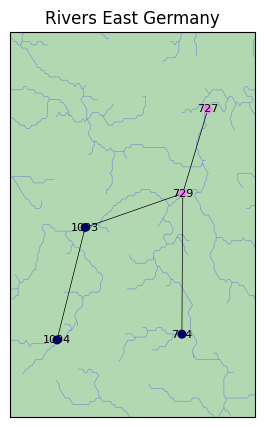

In [47]:
# Single Sample plotting works in the same way.
plot_current_state_of_graph(
    ds[6],
    dpi=100,
    autozoom=0.1,
    lim=(50.1, 54.8),
    limx=(9.65, 15.1),
    node_size=30,
    save=0,
    river_map=1,
    ger_map=1,
    width=0.5,
    arrowsize=0.5,
    fs=(5, 5),
    font_size=8,
    ger_path = "../visualization/east_german_map.shp",
    river_path = "../visualization/river_east_german_map.shp",
)